# Initialization

## Importing libraries

As a first step we load the different libraries we are going to use, in this simple example we only need tensorflow (keras) and numpy

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization,Dropout,Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ThresholdedReLU,ReLU
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

## Loading Data

Next step is to actually load the Cifar10 database and perform some simple pre-process in order to introduce it to the neural network


In [2]:
# Parameters of the model 
num_classes = 10 # number of output class (1-9)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # we load the data from keras.datsets library

# Normalize pixel values to be between 0 and 1
## Normalization ##
# Scale images to the [0, 1] range
x_train = x_train / 255 # images are encoded with up to 256 so to normalize from 0-1 we simply divide
x_test = x_test / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Visualize the dataset

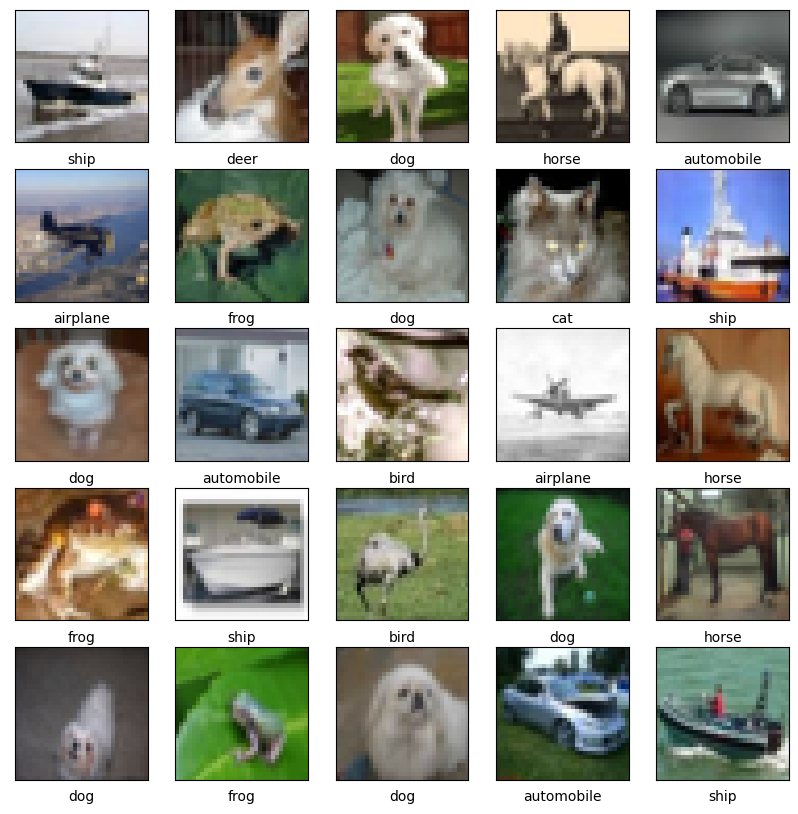

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1, 50000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[random_image])
    plt.xlabel(class_names[y_train[random_image][0]])
plt.show()

## Model related parameters

Here we define hyperparameters that are going to be used in the model and training below


In [20]:
n_epochs = 5 # Number of epochs, where 1 epoch = 1 use of the training set
n_batch_size = 64 # how many inputs are going to be used at the same time during one epoch. 
# note: small batch size can make the training faster but can make the generalization harder to achieve (less variety in sample)

neurons_conv2d1 = 16
kernel_size_conv2d1 = (3,3)
neurons_conv2d2 = 32
kernel_size_conv2d2 = (3,3)
default_pool_size = (2,2)

# number of neurons for the 1 hidden layers
neurons_l1 = 100


In [21]:
model = keras.Sequential()
model.add(Conv2D(neurons_conv2d1,kernel_size=kernel_size_conv2d1,input_shape=(32, 32, 3))) # obtaining features from image
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(neurons_conv2d2,kernel_size_conv2d2, strides =2))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(layers.Flatten())
model.add(layers.Dense(neurons_l1))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))
model.compile(
              optimizer="adam", # any optimizer works well, adam is a standard choice for simple problems
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function for classification = crossentropy
              metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)             

## Example of Training proccedure


Let's now train our model for a few epochs

In [23]:
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch_size)

Epoch 1/5
782/782 [==============================] - 57s 73ms/step - loss: 2.0485 - accuracy: 0.4208
Epoch 2/5
782/782 [==============================] - 65s 83ms/step - loss: 1.9521 - accuracy: 0.5152
Epoch 3/5
782/782 [==============================] - 58s 74ms/step - loss: 1.9080 - accuracy: 0.5590
Epoch 4/5
782/782 [==============================] - 58s 75ms/step - loss: 1.8803 - accuracy: 0.5849
Epoch 5/5
782/782 [==============================] - 56s 71ms/step - loss: 1.8596 - accuracy: 0.6062


## Evaluation

To evulate our model we need to see how well it performs to unknown data (test set):

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.8896546363830566
Test accuracy: 0.5723000168800354


In [25]:
predictions = model.predict(x_test)
predictions_binary = np.argmax(predictions, axis=1)
y_test_binary = np.transpose(y_test)

cr = classification_report(y_test[:,] , predictions_binary)
cm = confusion_matrix(y_test[:,] , predictions_binary)
print(cm)
print(cr)

[[507  21  20  16  27   8   2  10 301  88]
 [  9 621   1  10   8   6   1   3  99 242]
 [ 85  16 229  98 197 160  44  33  80  58]
 [ 17  22  15 450  96 199  34  31  51  85]
 [ 27  12  22  74 592  70  35  75  52  41]
 [ 15  12  16 192  63 568   8  48  33  45]
 [ 13  20  23 116 108  49 540  15  35  81]
 [  7   4   7  52  80 102   5 590  21 132]
 [ 29  43   0  12   4  10   1   3 840  58]
 [ 12  68   4  20   5   9   4   7  85 786]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      1000
           1       0.74      0.62      0.68      1000
           2       0.68      0.23      0.34      1000
           3       0.43      0.45      0.44      1000
           4       0.50      0.59      0.54      1000
           5       0.48      0.57      0.52      1000
           6       0.80      0.54      0.65      1000
           7       0.72      0.59      0.65      1000
           8       0.53      0.84      0.65      1000
           9       0.49     

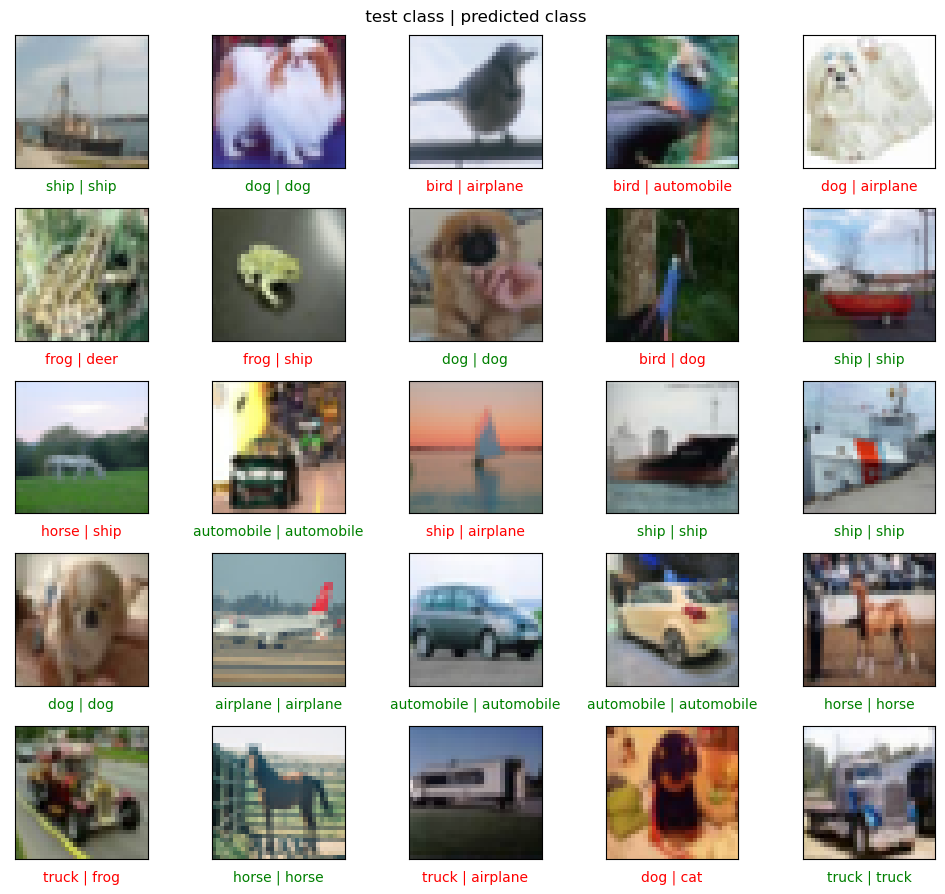

In [26]:
fig = plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1, 10000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[random_image])
    if class_names[int(y_test[random_image])] ==class_names[predictions_binary[random_image]]:
        plt.xlabel(class_names[int(y_test[random_image])] + " | " + class_names[predictions_binary[random_image]],color='green')
    else:
        plt.xlabel(class_names[int(y_test[random_image])] + " | " + class_names[predictions_binary[random_image]],color='red')
plt.suptitle(' test class | predicted class')
fig.tight_layout(rect=[0, 0.09, 1, 1])
plt.show()